In [1]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

# imports for database connection
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func

# import these to view table column headers & rows
from sqlalchemy.orm import sessionmaker
from sqlalchemy import select
%matplotlib inline

In [2]:
engine = create_engine("sqlite:///../Resources/covid_db.db")

In [3]:
# reflect an existing database into a new model (creates base class for automap schema)
Base = automap_base()

In [4]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['covid_stats', 'government_regulation']

In [6]:
# save references to each table
covid_stats = Base.classes.covid_stats
government_regulation = Base.classes.government_regulation

In [7]:
# Create session (link) from Python to the database
session = sessionmaker(bind=engine)()

In [8]:
# View table column headers & rows - covid_stats
covid_stats_table = select('*').select_from(covid_stats)
covid_stats_result = session.execute(covid_stats_table).fetchall()
# print(covid_stats.__table__.columns.keys())
# print(covid_stats_result)

In [9]:
# View table column headers & rows - government_regulation
government_regulation_table = select('*').select_from(government_regulation)
government_regulation_result = session.execute(government_regulation_table).fetchall()
# print(government_regulation.__table__.columns.keys())
# print(government_regulation_result)

In [10]:
# Merge covid_stats_table with government regulation_table
joined = session.query(covid_stats.primary_key_reaction,\
                        covid_stats.date_updated,\
                        covid_stats.iso_code,\
                        covid_stats.continent,\
                        covid_stats.location,\
                        covid_stats.population,\
                        covid_stats.population_density,\
                        covid_stats.median_age,\
                        covid_stats.new_cases,\
                        covid_stats.percentage_of_Pop_New_Cases,\
                        covid_stats.new_deaths,\
                        covid_stats.percentage_of_Pop_New_Deaths,\
                        covid_stats.new_tests,\
                        covid_stats.percentage_of_Pop_New_Tests,\
                        covid_stats.total_cases_updated,\
                        covid_stats.percentage_of_Pop_Total_Cases,\
                        covid_stats.total_deaths_updated,\
                        covid_stats.percentage_of_Pop_Total_Deaths,\
                        covid_stats.total_tests_updated,\
                        covid_stats.percentage_of_Pop_Total_Tests,\
                       government_regulation.primary_key_response,\
                       government_regulation.StringencyIndex_updated,\
                       government_regulation.percentage_change_stringency,\
                       government_regulation.StringencyLegacyIndex_updated,\
                       government_regulation.GovernmentResponseIndex_updated,\
                       government_regulation.percentage_change_GovernmentResponse,\
                       government_regulation.ContainmentHealthIndex_updated,\
                       government_regulation.percentage_change_ContainmentHealth,\
                       government_regulation.EconomicSupportIndex_updated,\
                       government_regulation.percentage_change_EconomicSupport)\
        .join(government_regulation,government_regulation.primary_key_response == covid_stats.primary_key_reaction)

# save the query results as a Pandas DataFrame and set the index
df = pd.DataFrame(joined, columns=['primary_key_reaction',
                                             'date_updated',
                                             'iso_code',
                                             'continent',
                                             'location',
                                             'population',
                                             'population_density',
                                             'median_age',
                                             'new_cases',
                                             'percentage_of_Pop_New_Cases',
                                             'new_deaths',
                                             'percentage_of_Pop_New_Deaths',
                                             'new_tests',
                                             'percentage_of_Pop_New_Tests',
                                             'total_cases_updated',
                                             'percentage_of_Pop_Total_Cases',
                                             'total_deaths_updated',
                                             'percentage_of_Pop_Total_Deaths',
                                             'total_tests_updated',
                                             'percentage_of_Pop_Total_Tests',
                                             'primary_key_response',
                                             'StringencyIndex_updated',
                                             'percentage_change_stringency',
                                             'StringencyLegacyIndex_updated',
                                             'GovernmentResponseIndex_updated',
                                             'percentage_change_GovernmentResponse',
                                             'ContainmentHealthIndex_updated',
                                             'percentage_change_ContainmentHealth',
                                             'EconomicSupportIndex_updated',
                                             'percentage_change_EconomicSupport'
                                             ])

In [11]:
# preview 
df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,55,0.000370,...,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,41,0.000276,...,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,96,0.000646,...,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,18,0.000121,...,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


In [12]:
# Check merged_covid.csv
print(df.dtypes)
print(df.shape)

# Display df
df.head()

primary_key_reaction                     object
date_updated                             object
iso_code                                 object
continent                                object
location                                 object
population                                int64
population_density                      float64
median_age                              float64
new_cases                                 int64
percentage_of_Pop_New_Cases             float64
new_deaths                                int64
percentage_of_Pop_New_Deaths            float64
new_tests                                 int64
percentage_of_Pop_New_Tests             float64
total_cases_updated                       int64
percentage_of_Pop_Total_Cases           float64
total_deaths_updated                      int64
percentage_of_Pop_Total_Deaths          float64
total_tests_updated                       int64
percentage_of_Pop_Total_Tests           float64
primary_key_response                    

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.8,41.2,2,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.8,41.2,0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.8,41.2,2,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.8,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.8,41.2,0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0


In [13]:
# check merged df for null values.
df.describe()

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
count,3.227700e+04,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,3.227700e+04,3.227700e+04,32277.000000,3.227700e+04,...,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000
mean,5.400962e+07,214.197672,31.332131,778.920656,0.001991,26.154042,5.072572e-07,8.487867e+03,0.024842,4.745188e+04,...,1.928935,58.044062,1.308332,64.012734,55.398830,1.274466,58.043087,1.226407,40.854943,0.337230
std,1.764115e+08,728.593605,9.175007,4360.424882,0.005546,138.626066,2.001007e-06,5.284508e+04,0.074306,2.709722e+05,...,5.493011,28.321004,19.904059,28.648400,24.321508,13.818227,25.638560,14.416320,32.776192,7.614218
min,9.834000e+04,1.980000,15.100000,-2461.000000,-0.221254,-1918.000000,-6.790114e-05,-3.743000e+03,-0.039824,0.000000e+00,...,0.000000,0.000000,-100.000000,0.000000,0.000000,-59.979210,0.000000,-59.947183,0.000000,-100.000000
25%,4.822233e+06,32.333000,23.500000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,7.200000e+01,...,0.000000,39.810000,0.000000,50.000000,44.870000,0.000000,44.700000,0.000000,0.000000,0.000000
50%,1.132662e+07,82.805000,31.100000,18.000000,0.000182,0.000000,0.000000e+00,0.000000e+00,0.000000,1.331000e+03,...,0.000000,65.740000,0.000000,72.620000,62.180000,0.000000,65.150000,0.000000,50.000000,0.000000
75%,3.892834e+07,204.430000,39.800000,221.000000,0.001469,4.000000,2.433856e-07,1.911000e+03,0.013440,1.297400e+04,...,0.968671,80.560000,0.000000,85.710000,73.720000,0.000000,77.270000,0.000000,75.000000,0.000000
max,1.439324e+09,7915.731000,48.200000,78761.000000,0.189258,4928.000000,1.193442e-04,1.194086e+06,1.657412,5.997163e+06,...,70.895970,100.000000,1965.107914,100.000000,96.150000,655.459272,100.000000,655.425220,100.000000,400.000000


In [14]:
df.columns

Index(['primary_key_reaction', 'date_updated', 'iso_code', 'continent',
       'location', 'population', 'population_density', 'median_age',
       'new_cases', 'percentage_of_Pop_New_Cases', 'new_deaths',
       'percentage_of_Pop_New_Deaths', 'new_tests',
       'percentage_of_Pop_New_Tests', 'total_cases_updated',
       'percentage_of_Pop_Total_Cases', 'total_deaths_updated',
       'percentage_of_Pop_Total_Deaths', 'total_tests_updated',
       'percentage_of_Pop_Total_Tests', 'primary_key_response',
       'StringencyIndex_updated', 'percentage_change_stringency',
       'StringencyLegacyIndex_updated', 'GovernmentResponseIndex_updated',
       'percentage_change_GovernmentResponse',
       'ContainmentHealthIndex_updated', 'percentage_change_ContainmentHealth',
       'EconomicSupportIndex_updated', 'percentage_change_EconomicSupport'],
      dtype='object')

## DF Total Deaths

In [15]:
# Create a df to test impact of some features on 'total deaths'
df_death_ml=df[['population','population_density','median_age','total_cases_updated','StringencyIndex_updated','total_deaths_updated']]
df_death_ml

,population,population_density,median_age,total_cases_updated,StringencyIndex_updated,total_deaths_updated
0,106766,584.800,41.2,2,0.00,0
1,106766,584.800,41.2,2,33.33,0
2,106766,584.800,41.2,4,33.33,0
3,106766,584.800,41.2,4,44.44,0
4,106766,584.800,41.2,4,44.44,0
...,...,...,...,...,...,...
32272,14862927,42.729,19.6,6251,80.56,179
32273,14862927,42.729,19.6,6292,80.56,189
32274,14862927,42.729,19.6,6388,80.56,195
32275,14862927,42.729,19.6,6406,80.56,196


In [16]:
# Check stats
df_death_ml.describe()

,population,population_density,median_age,total_cases_updated,StringencyIndex_updated,total_deaths_updated
count,3.227700e+04,32277.000000,32277.000000,3.227700e+04,32277.000000,32277.000000
mean,5.400962e+07,214.197672,31.332131,4.745188e+04,58.044062,2121.634662
std,1.764115e+08,728.593605,9.175007,2.709722e+05,28.321004,10533.562293
min,9.834000e+04,1.980000,15.100000,0.000000e+00,0.000000,0.000000
25%,4.822233e+06,32.333000,23.500000,7.200000e+01,39.810000,1.000000
50%,1.132662e+07,82.805000,31.100000,1.331000e+03,65.740000,26.000000
75%,3.892834e+07,204.430000,39.800000,1.297400e+04,80.560000,279.000000
max,1.439324e+09,7915.731000,48.200000,5.997163e+06,100.000000,183069.000000


In [17]:
# Check to make sure dtypes are appropriate .
df_death_ml.dtypes

population                   int64
population_density         float64
median_age                 float64
total_cases_updated          int64
StringencyIndex_updated    float64
total_deaths_updated         int64
dtype: object

In [18]:
# Check shape before dropping na
df_death_ml.shape

(32277, 6)

In [19]:
# Drop rows with null values
df_death_ml=df_death_ml.dropna(how='any')
df_death_ml.shape

(32277, 6)

## Predicting Number of Deaths- with NN Model

In [20]:
# create features(X) and target(y) sets
X = df_death_ml.drop(['total_deaths_updated'],axis=1).values

y = df_death_ml['total_deaths_updated'].values
y = y.reshape(-1,1)

In [21]:
# Check shape for num of features
X.shape

(32277, 5)

In [22]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
959/959 [==============================] - 2s 3ms/step - loss: 0.4460 - mse: 0.4460
Epoch 2/100
959/959 [==============================] - 2s 2ms/step - loss: 0.1344 - mse: 0.1344
Epoch 3/100
959/959 [==============================] - 3s 3ms/step - loss: 0.1118 - mse: 0.1118
Epoch 4/100
959/959 [==============================] - 2s 3ms/step - loss: 0.1045 - mse: 0.1045
Epoch 5/100
959/959 [==============================] - 3s 3ms/step - loss: 0.1002 - mse: 0.1002
Epoch 6/100
959/959 [=====================

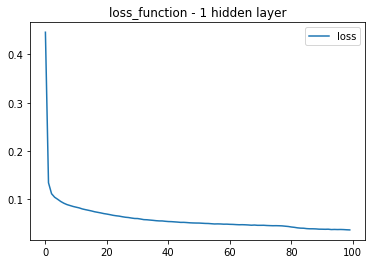

0.9636780252828445
0.9588956180827639


In [23]:
# define model - shallow neural net
number_hidden_nodes = 10
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))


In [24]:
# Print y_train and y_test predicted[0]
print(y_train_pred)
print(y_test_pred)

[[-0.29543114]
 [ 0.04340363]
 [-0.22209454]
 ...
 [-0.09800148]
 [-0.18030238]
 [-0.21039772]]
[[-0.18385625]
 [-0.27845764]
 [-0.1250956 ]
 ...
 [-0.23790705]
 [-0.1931417 ]
 [-0.19758797]]


In [25]:
# Convert the scaled predictions to actual values.
print(y_scaler.inverse_transform(y_train_pred))
print(y_scaler.inverse_transform(y_test_pred))

[[-987.9443 ]
 [2569.5154 ]
 [-217.976  ]
 ...
 [1084.8893 ]
 [ 220.80403]
 [ -95.16984]]
[[ 183.49153 ]
 [-809.73773 ]
 [ 800.42535 ]
 ...
 [-383.99307 ]
 [  86.00277 ]
 [  39.320885]]


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
959/959 [==============================] - 3s 3ms/step - loss: 0.7679 - mse: 0.7679
Epoch 2/100
959/959 [==============================] - 2s 2ms/step - loss: 0.1566 - mse: 0.1566
Epoch 3/100
959/959 [==============================] - 2s 2ms/step - loss: 0.1179 - mse: 0.1179
Epoch 4/100
959/959 [==============================] - 3s 3ms/step - loss: 0.1069 - mse: 0.1069
Epoch 5/100
959/959 [==============================] - 2s 2ms/step - loss: 0.0987 - mse: 0.0987
Epoch 6/100
959/959 [=================

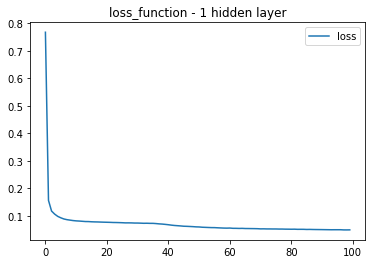

0.9517968880849196
0.9505931897865187


In [26]:
# define model - shallow neural net with 3X
number_hidden_nodes = 15
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

In [27]:
print(y_scaler.inverse_transform(y_train_pred))
print(y_scaler.inverse_transform(y_test_pred))

[[  120.79281]
 [-1152.2394 ]
 [ -842.7675 ]
 ...
 [ 1079.8163 ]
 [ 1692.3958 ]
 [  760.69147]]
[[ 294.05014]
 [-585.5395 ]
 [ -93.50382]
 ...
 [-654.44696]
 [  20.00228]
 [-278.18985]]


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
959/959 [==============================] - 3s 3ms/step - loss: 0.3442 - mse: 0.3442
Epoch 2/100
959/959 [==============================] - 3s 3ms/step - loss: 0.1165 - mse: 0.1165
Epoch 3/100
959/959 [==============================] - 3s 3ms/step - loss: 0.1095 - mse: 0.1095
Epoch 4/100
959/959 [==============================] - 3s 3ms/step - loss: 0.1032 - mse: 0.1032
Epoch 5/100
959/959 [==============================] - 3s 3ms/step - loss: 0.0985 - mse: 0.0985
Epoch 6/100
959/959 [=================

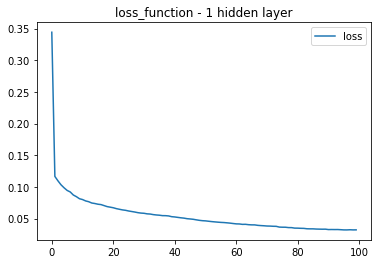

0.9692482050169507
0.9676945360328538


In [28]:
# conclusion: did not add value
# define model - shallow neural net with 4X
number_hidden_nodes = 20
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

In [29]:
print(y_scaler.inverse_transform(y_train_pred))
print(y_scaler.inverse_transform(y_test_pred))

[[  185.76534]
 [ 4633.636  ]
 [-1426.8007 ]
 ...
 [ 1209.8518 ]
 [ 1101.5752 ]
 [  216.60957]]
[[ 455.73093]
 [-754.0036 ]
 [ 845.89276]
 ...
 [ 172.92476]
 [ 837.43207]
 [ 757.8797 ]]


## Deep Neural Network

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
959/959 [==============================] - 2s 2ms/step - loss: 0.4989 - mse: 0.4989
Epoch 2/100
959/959 [==============================] - 3s 3ms/step - loss: 0.1018 - mse: 0.1018
Epoch 3/100
959/959 [==============================] - 3s 3ms/step - loss: 0.0941 - mse: 0.0941
Epoch 4/100
959/959 [==============================] - 3s 3ms/step - loss: 0.0896 - mse: 0.0896
Ep

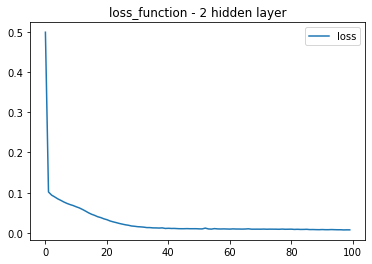

0.9917663785121426
0.9911735812645374


In [30]:
# Define the model - deep neural net
number_input_features = 5
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

In [31]:
print(y_scaler.inverse_transform(y_train_pred))
print(y_scaler.inverse_transform(y_test_pred))

[[-123.18839]
 [ 522.98126]
 [-517.9323 ]
 ...
 [ 708.43414]
 [ 792.82416]
 [ 129.91573]]
[[ -29.924234  ]
 [ 190.62788   ]
 [ 224.1313    ]
 ...
 [-291.7333    ]
 [ -82.8903    ]
 [   0.40364712]]


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
959/959 [==============================] - 3s 3ms/step - loss: 0.3650 - mse: 0.3650
Epoch 2/150
959/959 [==============================] - 3s 3ms/step - loss: 0.1066 - mse: 0.1066
Epoch 3/150
959/959 [==============================] - 3s 3ms/step - loss: 0.0970 - mse: 0.0970
Epoch 4/150
959/959 [==============================] - 2s 2ms/step - loss: 0.0892 - mse: 0.0892
Ep

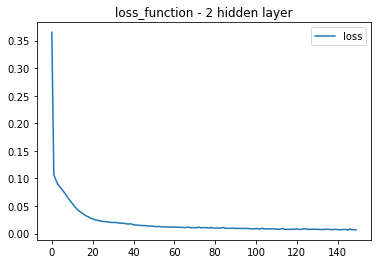

0.9937122713872252
0.9942811332360573


In [32]:
# Define the model - deep neural net 3X
number_input_features = 5
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 5
epochs=150
nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=epochs)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

In [33]:
print(y_scaler.inverse_transform(y_train_pred))
print(y_scaler.inverse_transform(y_test_pred))

[[ 210.52962 ]
 [1678.3795  ]
 [ -18.57023 ]
 ...
 [ 692.3825  ]
 [-271.03848 ]
 [  71.229576]]
[[ -53.811684]
 [ -88.322426]
 [-130.58684 ]
 ...
 [-269.2875  ]
 [-171.16765 ]
 [ 173.56209 ]]


## Deep Neural Network with three hidden layers

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
959/959 [==============================] - 3s 3ms/step - loss: 0.2985 - mse: 0.2985
Epoch 2/100
959/959 [==============================] - 3s 3ms/step - loss: 0.1117 - mse: 0.1117
Epoch 3/100
959/959 [==============================] - 3s 3ms/step - loss: 0.1022 - mse: 0.1022
Epoch 4/100
959/959 [==============================] - 2s 2ms/step - loss: 0.0970 - mse: 0.0970
Ep

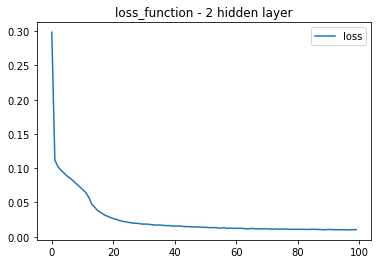

0.989533185854248
0.9879312029782551


In [34]:
# Define the model - deep neural net 3X
number_input_features = 5
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 5

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

In [35]:
print(y_scaler.inverse_transform(y_train_pred))
print(y_scaler.inverse_transform(y_test_pred))

[[ 263.1766 ]
 [2273.4004 ]
 [ 578.93085]
 ...
 [ 883.29193]
 [ 553.07794]
 [ 657.9869 ]]
[[   18.137777]
 [-1073.7606  ]
 [  325.671   ]
 ...
 [  -34.206215]
 [  462.426   ]
 [  100.04122 ]]


## Predicting Number of Cases- with NN Model

In [36]:
X = df_cases_ml.drop(['total_cases_updated'],axis=1).values

y = df_cases_ml['total_cases_updated'].values
y = y.reshape(-1,1)

NameError: name 'df_cases_ml' is not defined

In [37]:
# Split dataset into training and testing 
# train 90% of data, test 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler = StandardScaler()
y_scaler.fit(y_train)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled =y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
908/908 [==============================] - 2s 2ms/step - loss: 0.3180 - mse: 0.3180
Epoch 2/100
908/908 [==============================] - 4s 5ms/step - loss: 0.1247 - mse: 0.1247
Epoch 3/100
908/908 [==============================] - 3s 3ms/step - loss: 0.1119 - mse: 0.1119
Epoch 4/100
908/908 [==============================] - 2s 2ms/step - loss: 0.1054 - mse: 0.1054
Epoch 5/100
908/908 [==============================] - 4s 5ms/step - loss: 0.1006 - mse: 0.1006
Epoch 6/100
908/908 [===================

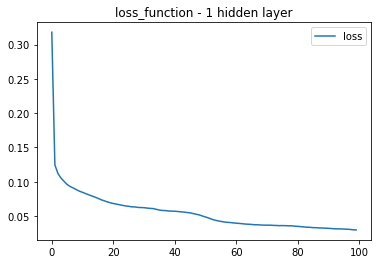

0.970766885405649
0.966865573501597


In [38]:
# define model - shallow neural net
number_hidden_nodes = 10
number_input_features = 5
epochs=100
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=epochs )

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

In [39]:
print(y_scaler.inverse_transform(y_train_pred))
print(y_scaler.inverse_transform(y_test_pred))

[[ 957.537  ]
 [-349.56384]
 [ 191.36865]
 ...
 [-203.46204]
 [ 290.7389 ]
 [-342.18616]]
[[-155.71472]
 [ 406.83167]
 [-222.00085]
 ...
 [-141.81775]
 [-131.58044]
 [ 522.71875]]


 0.0290
Epoch 297/500
908/908 [==============================] - 5s 6ms/step - loss: 0.0286 - mse: 0.0286
Epoch 298/500
908/908 [==============================] - 6s 7ms/step - loss: 0.0294 - mse: 0.0294
Epoch 299/500
908/908 [==============================] - 6s 6ms/step - loss: 0.0288 - mse: 0.0288
Epoch 300/500
908/908 [==============================] - 6s 6ms/step - loss: 0.0288 - mse: 0.0288
Epoch 301/500
908/908 [==============================] - 5s 6ms/step - loss: 0.0289 - mse: 0.0289
Epoch 302/500
908/908 [==============================] - 5s 6ms/step - loss: 0.0286 - mse: 0.0286
Epoch 303/500
908/908 [==============================] - 6s 6ms/step - loss: 0.0290 - mse: 0.0290
Epoch 304/500
908/908 [==============================] - 5s 5ms/step - loss: 0.0288 - mse: 0.0288
Epoch 305/500
908/908 [==============================] - 5s 6ms/step - loss: 0.0290 - mse: 0.0290
Epoch 306/500
908/908 [==============================] - 6s 6ms/step - loss: 0.0290 - mse: 0.0290
Epoch 307/50

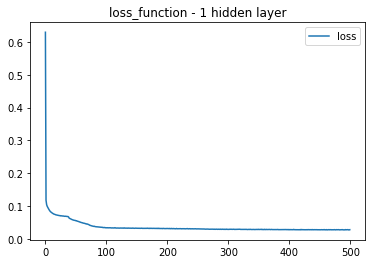

0.9669453729713672
0.9603786088478788


In [40]:
# define model - shallow neural net 3X
number_hidden_nodes = 15
number_input_features = 5
epochs=500
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=epochs )

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

In [41]:
print(y_scaler.inverse_transform(y_train_pred))
print(y_scaler.inverse_transform(y_test_pred))

[[ 939.1489  ]
 [-557.8871  ]
 [ 216.43506 ]
 ...
 [ 536.4475  ]
 [ -68.51941 ]
 [  26.130249]]
[[  636.9586 ]
 [ -132.74377]
 [  779.3639 ]
 ...
 [-1345.2303 ]
 [  139.81848]
 [ 1793.5842 ]]
